### 1. Problem Formulation

For a Retail bank, analyse the current loans and its customer profiles so as to help classify good and NOT a good loan applications in future.

If a future loan application meets all required criteria then its a good loan, while if it doesn't then it's NOT a good loan.

### 2. Libraries / Packages

In [41]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
#from sklearn.dummy import DummyClassifier
from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.feature_selection import RFE 
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

%matplotlib inline

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})


### 3. Data Preprocessing

In [2]:
# Load the dataset and place it into a Dataframe

# If you want to load csv without DafaFrame including an index column
# df = pd.read_csv('loans.csv', index_col = 0)

df = pd.read_csv('loans.csv')

#### a) Exploratory Data Analysis

##### Number of observations (rows) and features (columns)

In [3]:
# Check the top 5 rows.
df.head(5)

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Status,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


In [4]:
# Check the bottom 5 rows.
df.tail(5)

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Status,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
1001,Type C,Average (known delays),TV,12759.0,500-1000,5-7 Years,Male,No,Vehicle,38.0,House Owner,Professional / Management,No,Yes
1002,Type C,Average (known delays),Buying a New Car,2551.0,0-200,7+ Years,Male,No,Vehicle,47.0,House Owner,Services,No,No
1003,Type C,Average (known delays),TV,1587.0,200-500,7+ Years,Male,No,Vehicle,35.0,House Owner,Services,No,Yes
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,House Owner,Services,No,NaN
1005,NaN,NaN,NaN,1765.0,0-201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Print the shape
print(df.shape)

(1006, 14)


##### Number of elements (data values) in each feature

In [6]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Type of Account        1004 non-null   object 
 1   Account History        1004 non-null   object 
 2   Reason for the Loan    1003 non-null   object 
 3   Loan Amount            1003 non-null   float64
 4   Account Savings        1002 non-null   object 
 5   Employment History     1001 non-null   object 
 6   Individual Status      1001 non-null   object 
 7   Other Loans            1001 non-null   object 
 8   Security / Collateral  1001 non-null   object 
 9   Age                    1002 non-null   float64
 10  Residence Status       1002 non-null   object 
 11  Job                    1002 non-null   object 
 12  Completed Other loan?  1002 non-null   object 
 13  Good Loan              1001 non-null   object 
dtypes: float64(2), object(12)
memory usage: 110.2+ KB


##### Investigate string values in the numerical columns and replace it with zeros

In [ ]:
# isnull() method cannot find string values.
#Check the csv file for any string values other than NaN or NA

##### Investigate null data values in the dataset and replace it with zeros

In [5]:
# Null values = missing values or invalid values like Not a Number (NaN).
df.isnull().sum()

Type of Account          2
Account History          2
Reason for the Loan      3
Loan Amount              3
Account Savings          4
Employment History       5
Individual Status        5
Other Loans              5
Security / Collateral    5
Age                      4
Residence Status         4
Job                      4
Completed Other loan?    4
Good Loan                5
dtype: int64

In [6]:
# Individually investigate these rows with null values to decide whether to
# to keep it or edit it.
# Shows all rows with NaN in 'Individual Status'
df[df['Individual Status'].isnull()] 

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Status,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
686,Type C,Good,Buying a New Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,Type C,critical,Home furniture,5387.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,Type C,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,House Owner,Services,No,NaN
1005,NaN,NaN,NaN,1765.0,0-201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# As null values in 'Individual Status' column has almost empty rows, drop those rows.
df = df.dropna(subset = ['Individual Status'])

In [9]:
# Print the shape
print(df.shape) # dropped from 1006 to 1001 (5 rows will null values dropped)

(1001, 14)


In [11]:
# Rerun to check the Null values
df.isnull().sum() # there is none.

Type of Account          0
Account History          0
Reason for the Loan      0
Loan Amount              0
Account Savings          0
Employment History       0
Individual Status        0
Other Loans              0
Security / Collateral    0
Age                      0
Residence Status         0
Job                      0
Completed Other loan?    0
Good Loan                0
dtype: int64

##### Investigate unique values in the dataset

In [10]:
# Query goes through all values in each column, then counts them and then
# lists them.
# These unique values will become INDIVIDUAL NUMERICAL COLUMNS when converted
# from categorical to numerical representation.

for column in df:
    unique_values = np.unique(df[column])
    count_unique_values = len(unique_values)
    if count_unique_values < 10:
        print('The number of unique values for features {} :{} -- {}'.format(column, count_unique_values, unique_values))
    else:
        print('The number of unique values for features {} :{}'.format(column, count_unique_values))

The number of unique values for features Type of Account :4 -- ['No Data' 'Type A' 'Type B' 'Type C']
The number of unique values for features Account History :3 -- ['Average (known delays)' 'Good' 'critical']
The number of unique values for features Reason for the Loan :10
The number of unique values for features Loan Amount :911
The number of unique values for features Account Savings :5 -- ['0-200' '1000+' '200-500' '500-1000' 'No Data']
The number of unique values for features Employment History :5 -- ['0-2 Years' '2-5 Years' '5-7 Years' '7+ Years' 'Unemployed']
The number of unique values for features Individual Status :5 -- ['Divorced' 'Female' 'Female_' 'Male' 'Married']
The number of unique values for features Other Loans :2 -- ['No' 'Yes']
The number of unique values for features Security / Collateral :4 -- ['No Security' 'Property - Real Estate' 'Savings Account' 'Vehicle']
The number of unique values for features Age :57
The number of unique values for features Residence Sta

In [ ]:
# The above unique values shows column 'Loan Amount' and 'Age' as numerical values. 
# The rest are categorical values.
# The categorical features have to be converted to numerical representation 
# to be used in the logistic regression algorithm.

##### Investigate distribution and relationships

In [ ]:
# Closely visualize the relationship between the 'Loan Amount' and 'Age'
# becaue its the only two numerical features available in the dataset.
# This allows to remove any outliers.
# sns.pairplot(df). Can do this too as df only has two numerical features.
sns.pairplot(df[['Loan Amount', 'Age']])

<AxesSubplot:ylabel='Frequency'>

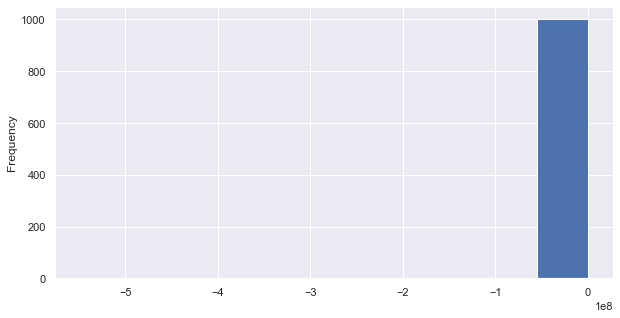

In [13]:
# Visualize histogram plot for 'Loan Amount'
plt.figure(figsize = (10, 5))
df['Loan Amount'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

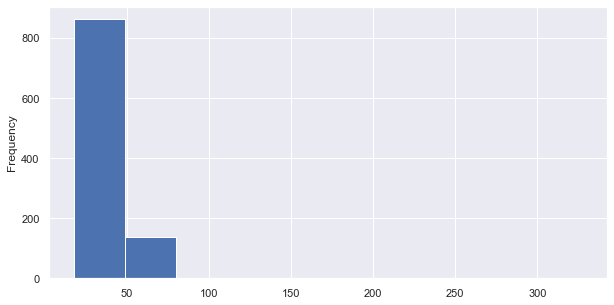

In [14]:
# Visualize histogram for 'Age'
plt.figure(figsize = (10, 5))
df['Age'].plot(kind='hist')

#### b) Data Cleaning

In [11]:
# Remove the outliers based on sns.pairplot()
df_filtered = df[df['Age'] < 100] # Keeps only values less than 100

df_filtered.shape

(1000, 14)

In [ ]:
# Visualize the relationship between the 'Loan Amount' and 'Age' after cleaning.
sns.pairplot(df_filtered[['Loan Amount', 'Age']])

In [ ]:
# Visualize the relationship between the 'Loan Amount' and 'Age' after cleaning.
# And find out how the feature 'Good Loan' plays a role in this relationship 
# between 'Loan Amount' and 'Age'
sns.pairplot(df_filtered[['Loan Amount', 'Age']], hue = 'Good Loan')
# It shows that most of the 'Good Loan' is concentrated in the region of 
# lower loan amount and lower age. As loan amount increases it's not a good
# loan and as age increases its not a good loan.

#### c) Data Aggregation

#### d) Data Join / Merge

#### e) Data Scaling - Normalization / Standardization

In [ ]:
# No need to normalize/standardize data in logistic regression due to the
# logistic function (0 or 1)

#### f) Data Conversion - Numerical / Categorical

In [12]:
# Recalling all the column labels
df_filtered.columns

Index(['Type of Account', 'Account History', 'Reason for the Loan',
       'Loan Amount', 'Account Savings', 'Employment History',
       'Individual Status', 'Other Loans', 'Security / Collateral', 'Age',
       'Residence Status', 'Job', 'Completed Other loan?', 'Good Loan'],
      dtype='object')

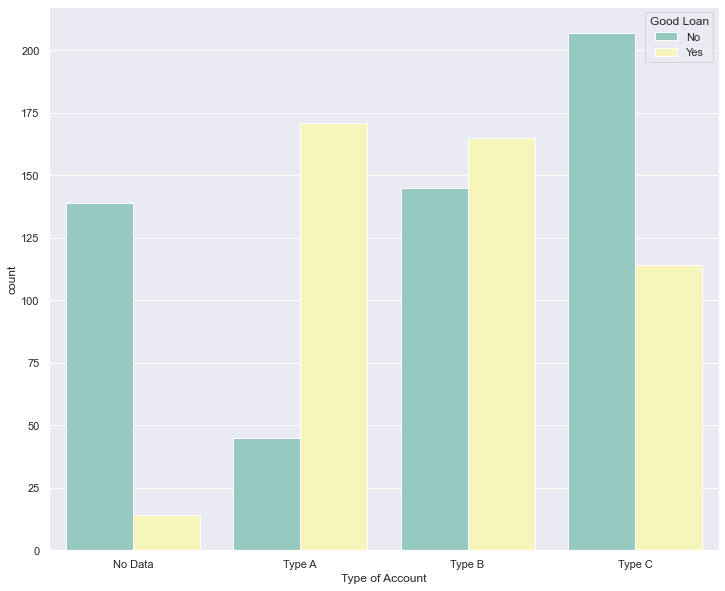

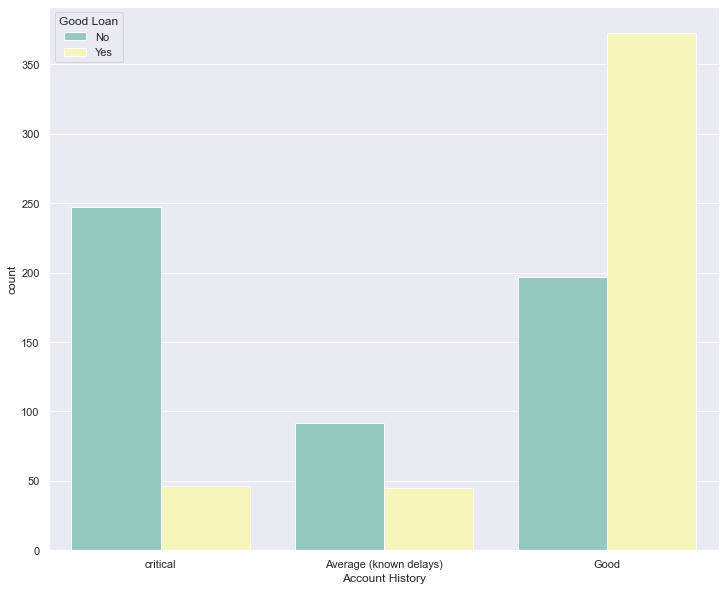

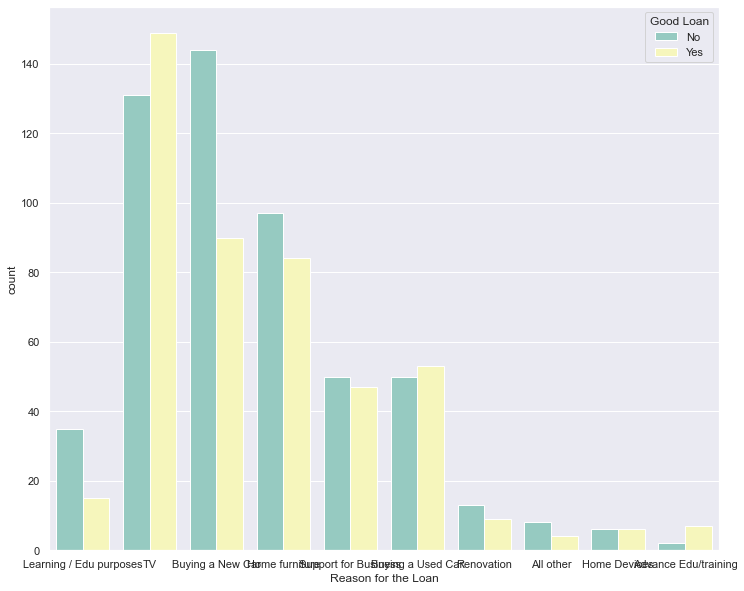

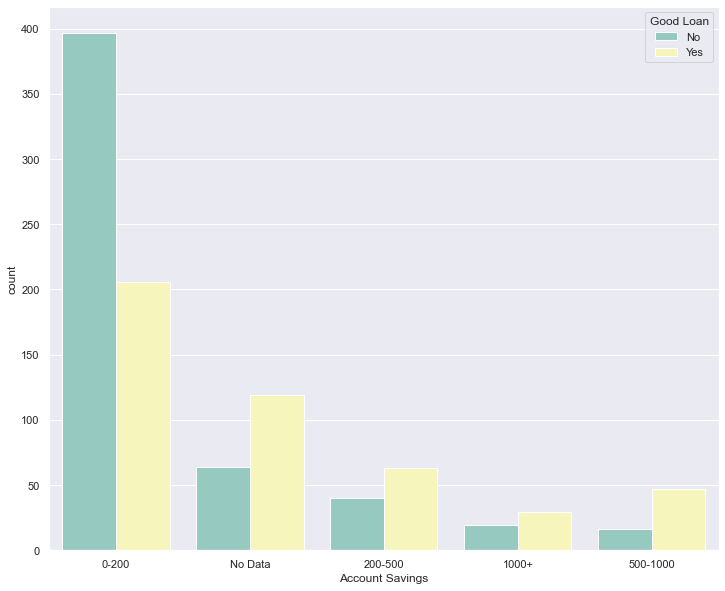

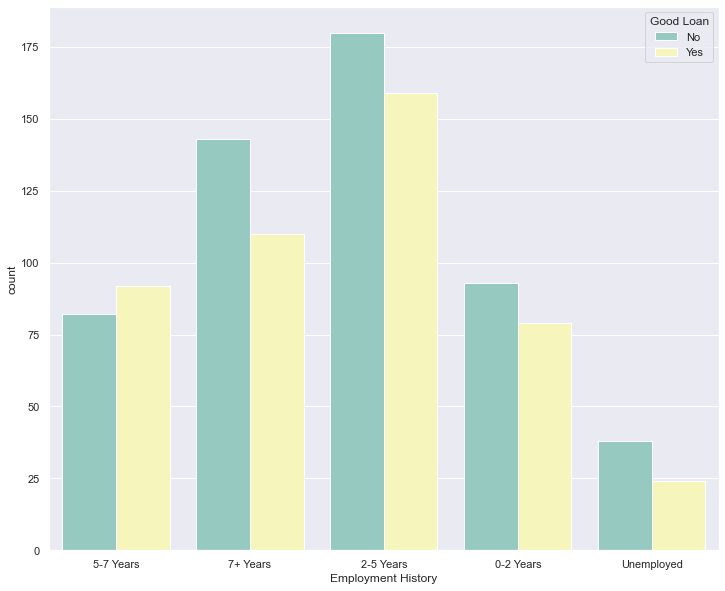

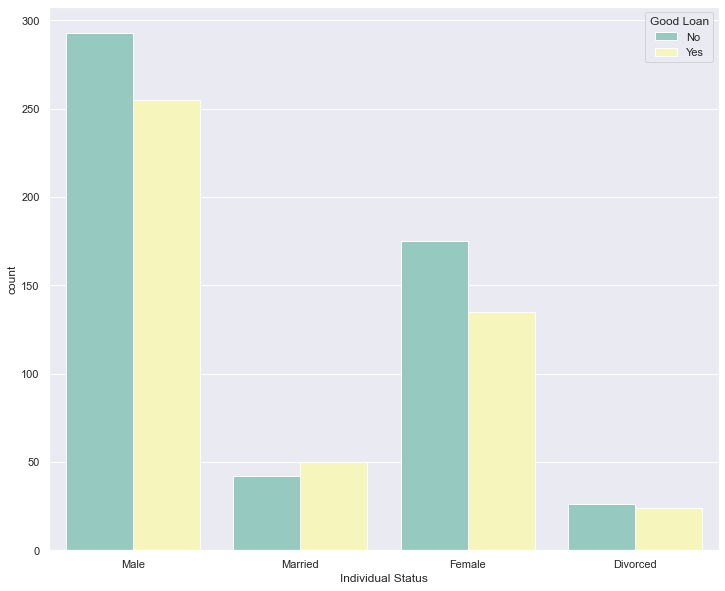

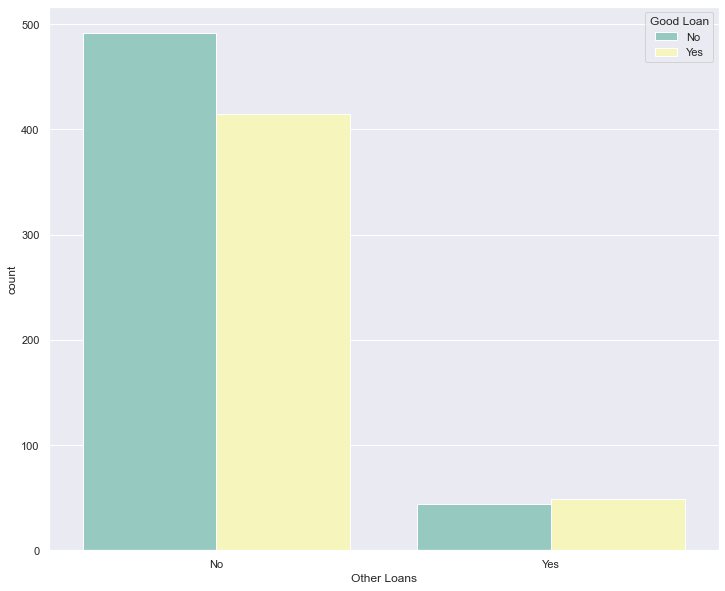

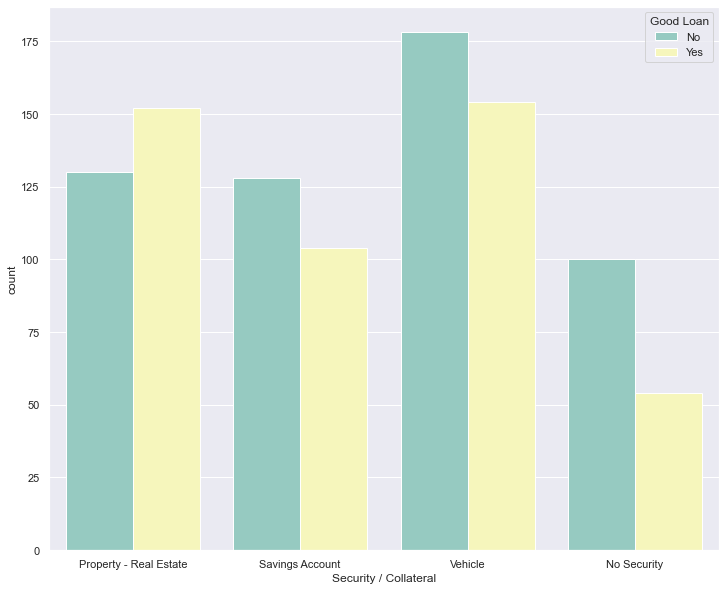

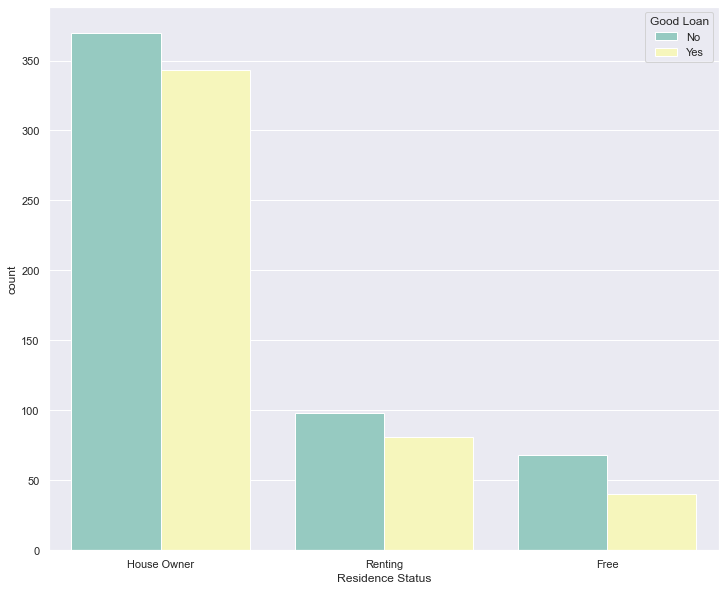

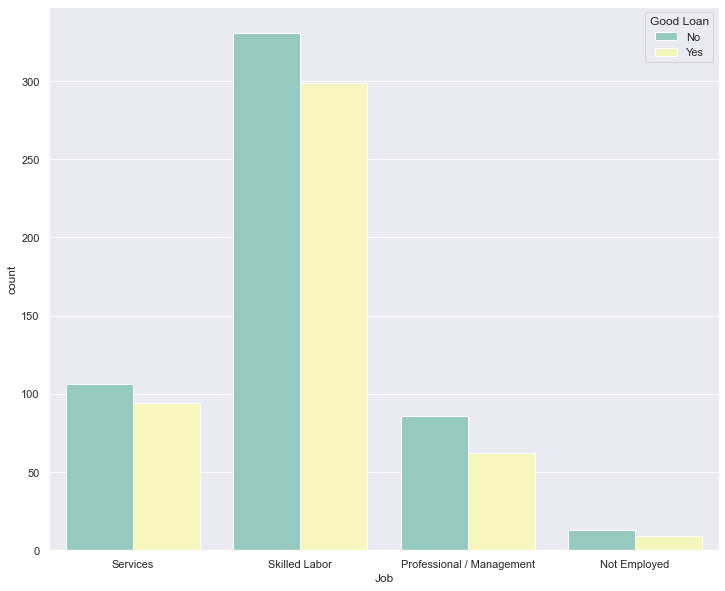

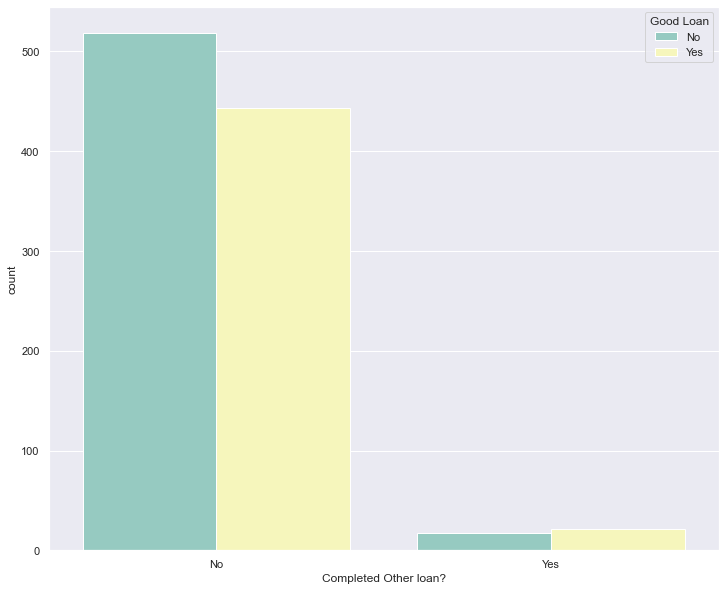

In [13]:
# Investigate relationships between features w.r.t 'Good Loan' - y variable
# This aides selection of important features. 
# Loop through the features and plot a count plot using sns.countplot()

# Create a columns list without the numeric columns - Loan Amount and Age
# Also don't include 'Good Loan' (categorial), because it can be done
# separately.
cat_columns = ['Type of Account', 'Account History', 'Reason for the Loan',
       'Account Savings', 'Employment History',
       'Individual Status', 'Other Loans', 'Security / Collateral',
       'Residence Status', 'Job', 'Completed Other loan?']

for c in cat_columns:
    sns.countplot(x = c, data = df_filtered, palette = 'Set3', hue = 'Good Loan')
    plt.show()

In [14]:
# Convert all important categorical columns into numerical representation
# using get_dummies() method before using logistic algorithm. 
# Can also use Label Encoding and OneHotEncoder from the preprocessing library
# to convert categorical into numerical representation.
# The logistic algorithm does not take categorical features.
# Check the results with one column - 'Account History'
df_cat_num_ah = pd.get_dummies(df_filtered, columns = ['Account History'])

# Investigate changes
df_cat_num_ah

,Type of Account,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Status,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan,Account History_Average (known delays),Account History_Good,Account History_critical
0,No Data,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No,0,0,1
1,No Data,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No,0,0,1
2,No Data,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No,0,0,1
3,No Data,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No,0,0,1
4,No Data,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,Type C,Buying a Used Car,3602.0,0-200,0-2 Years,Female,No,Savings Account,47.0,House Owner,Services,No,No,1,0,0
1000,Type C,TV,4473.0,0-200,2-5 Years,Female,No,Property - Real Estate,35.0,House Owner,Skilled Labor,No,No,1,0,0
1001,Type C,TV,12759.0,500-1000,5-7 Years,Male,No,Vehicle,38.0,House Owner,Professional / Management,No,Yes,1,0,0
1002,Type C,Buying a New Car,2551.0,0-200,7+ Years,Male,No,Vehicle,47.0,House Owner,Services,No,No,1,0,0


In [15]:
# If satisfied with the conversion, apply it to all other categorical columns.
# The below code will get dummies for the whole data (df_filtered data) but 
# only apply to the columns in the features list.
df_cat_num = pd.get_dummies(df_filtered, columns = cat_columns)

In [16]:
print(df_filtered.shape)

(1000, 14)


In [18]:
print(df_cat_num.shape) # shows more columns due to converting categories
# into numerical represtation.

(1000, 49)


In [10]:
# Check the changes
df_cat_num

,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,...,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,No,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,2438.0,52.0,No,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,2144.0,48.0,No,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0
3,2073.0,25.0,No,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
4,1276.0,59.0,No,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,3602.0,47.0,No,0,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
1000,4473.0,35.0,No,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
1001,12759.0,38.0,Yes,0,0,0,1,1,0,0,...,1,0,1,0,0,1,0,0,1,0
1002,2551.0,47.0,No,0,0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0


In [20]:
# Now convert the response y variable (Good Loan) into numerical data.
# To create a new 0-1 y variable, use '0' as No and '1' as Yes.

df_cat_num['Good Loan'][df_cat_num['Good Loan'] == 'Yes'] = 1
df_cat_num['Good Loan'][df_cat_num['Good Loan'] == 'No'] = 0

<ipython-input-20-1efc56aaba5c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_num['Good Loan'][df_cat_num['Good Loan'] == 'Yes'] = 1
<ipython-input-20-1efc56aaba5c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_num['Good Loan'][df_cat_num['Good Loan'] == 'No'] = 0


In [22]:
# Investigate the dataframe. It has all columns including Features and Response.
df_cat_num

,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,...,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,2438.0,52.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,2144.0,48.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0
3,2073.0,25.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
4,1276.0,59.0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,3602.0,47.0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
1000,4473.0,35.0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
1001,12759.0,38.0,1,0,0,0,1,1,0,0,...,1,0,1,0,0,1,0,0,1,0
1002,2551.0,47.0,0,0,0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0


#### g) Feature Selection

<AxesSubplot:xlabel='Good Loan', ylabel='count'>

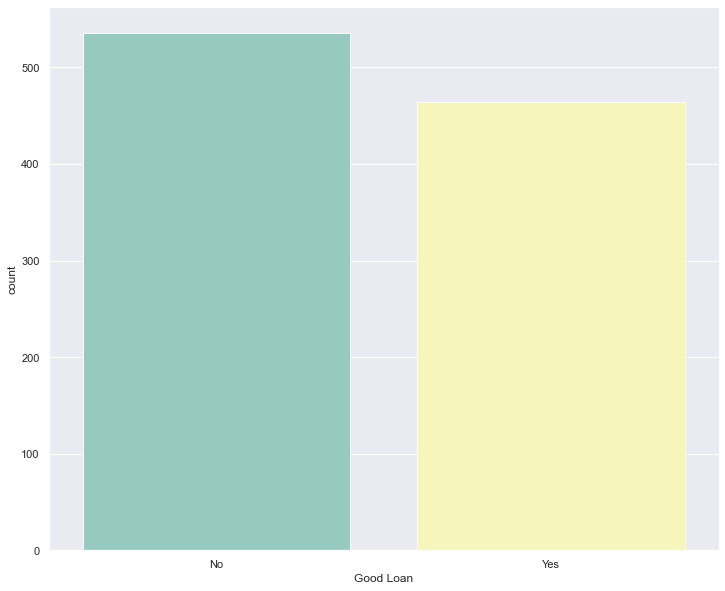

In [107]:
# Investigate the distribution of response variable (y) - Good Loan
sns.countplot(x = 'Good Loan', data = df_filtered, palette = 'Set3')

In [ ]:
# If there are plenty of features, select fewer numbers to avoid high
# computational resources. In this example we will use all of them.

#### i) Feature Importance

#### Steps of Running Feature Importance
- Split the data into X & y
- Run a Tree-based estimators (i.e. decision trees & random forests) 
- Run Feature Importance

In [23]:
# Split the data into X & y for Decision Tree Classifier

X = df_cat_num.drop('Good Loan', axis = 1).values
y = df_cat_num['Good Loan']

# Make sure 'y' is an integer
y = y.astype(int)

print(X.shape)
print(y.shape)

(1000, 48)
(1000,)


In [24]:
##### Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=100, criterion = 'entropy', max_depth = 15)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=100)

In [110]:
# Running Feature Importance

# This shows feature importances for all the features.

for i,column in enumerate(df_cat_num.drop('Good Loan', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))

The feature importance for Loan Amount is : 0.14235885972794823
The feature importance for Age is : 0.08554971228774728
The feature importance for Type of Account_No Data is : 0.04527723812100369
The feature importance for Type of Account_Type A is : 0.04151745327498232
The feature importance for Type of Account_Type B is : 0.015898343224668387
The feature importance for Type of Account_Type C is : 0.004310147022099245
The feature importance for Account History_Average (known delays) is : 0.004268356446140064
The feature importance for Account History_Good is : 0.15971353788196024
The feature importance for Account History_critical is : 0.0
The feature importance for Reason for the Loan_Advance Edu/training is : 0.0
The feature importance for Reason for the Loan_All other is : 0.0
The feature importance for Reason for the Loan_Buying a New Car is : 0.01620481009337136
The feature importance for Reason for the Loan_Buying a Used Car is : 0.005487575682857437
The feature importance for R

In [29]:
# However as Feature Importance is not shown in the order of importance. So to 
# select the features with highest importance is to add them in a DataFrame, 
# order them on the basis of highest values. To do this ;

# Initialize two empty lists.
fi_column = [] # feature importance column equals empty
fi = [] # the actual feature importance equals empty
    
    
# Copy the feature importances code from above
for i,column in enumerate(df_cat_num.drop('Good Loan', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    
    fi_column.append(column) # save the column name in fi_column list
    fi.append(dt.feature_importances_[i]) # save the importance in fi list

The feature importance for Loan Amount is : 0.14235885972794823
The feature importance for Age is : 0.08554971228774728
The feature importance for Type of Account_No Data is : 0.04527723812100369
The feature importance for Type of Account_Type A is : 0.04151745327498232
The feature importance for Type of Account_Type B is : 0.015898343224668387
The feature importance for Type of Account_Type C is : 0.004310147022099245
The feature importance for Account History_Average (known delays) is : 0.004268356446140064
The feature importance for Account History_Good is : 0.15971353788196024
The feature importance for Account History_critical is : 0.0
The feature importance for Reason for the Loan_Advance Edu/training is : 0.0
The feature importance for Reason for the Loan_All other is : 0.0
The feature importance for Reason for the Loan_Buying a New Car is : 0.01620481009337136
The feature importance for Reason for the Loan_Buying a Used Car is : 0.005487575682857437
The feature importance for R

In [30]:
# Adding the feature importances to a DataFrame

# Creating a Dataframe
fi_column
fi

fi_df = zip(fi_column, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df

,Feature,Feature Importance
0,Loan Amount,0.142359
1,Age,0.085550
2,Type of Account_No Data,0.045277
3,Type of Account_Type A,0.041517
4,Type of Account_Type B,0.015898
5,Type of Account_Type C,0.004310
6,Account History_Average (known delays),0.004268
7,Account History_Good,0.159714
8,Account History_critical,0.000000
9,Reason for the Loan_Advance Edu/training,0.000000


In [28]:
# Ordering the data by Feature importance
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

fi_df
# Shows 'Account Savings 0-200' is the feature that gives the most information
# gain when it comes to predicting if its a good loan or a not a good loan.
# Then comes 'Account_History_Good', then 'Loan Amount', then 'Age' and so on..

,index,Feature,Feature Importance
0,19,Account Savings_0-200,0.166570
1,7,Account History_Good,0.159714
2,0,Loan Amount,0.142359
3,1,Age,0.085550
4,2,Type of Account_No Data,0.045277
5,3,Type of Account_Type A,0.041517
6,45,Job_Skilled Labor,0.020224
7,24,Employment History_0-2 Years,0.019338
8,23,Account Savings_No Data,0.018018
9,18,Reason for the Loan_TV,0.016215


In [31]:
# Save the features with the most information gain as columns to be used in the
# model and exclude the rest. 

# Keep the features until index 41 as the rest shows 'zero' feature importance.
fi_df_important = fi_df['Feature'][0:42]

#show fi_df_important
fi_df_important

0                                      Loan Amount
1                                              Age
2                          Type of Account_No Data
3                           Type of Account_Type A
4                           Type of Account_Type B
5                           Type of Account_Type C
6           Account History_Average (known delays)
7                             Account History_Good
8                         Account History_critical
9         Reason for the Loan_Advance Edu/training
10                   Reason for the Loan_All other
11            Reason for the Loan_Buying a New Car
12           Reason for the Loan_Buying a Used Car
13                Reason for the Loan_Home Devices
14              Reason for the Loan_Home furniture
15     Reason for the Loan_Learning / Edu purposes
16                  Reason for the Loan_Renovation
17        Reason for the Loan_Support for Business
18                          Reason for the Loan_TV
19                           Ac

In [32]:
# Refining DataFrame with just the features that are important - fi_df_important
df_cat_num_features = df_cat_num[fi_df_important]

### 4. Select X and y - Hold-out validation

In [33]:
# Comparing DataFrames before and after Feature Importance
print(df_cat_num.shape)
print(df_cat_num_features.shape)

(1000, 49)
(1000, 42)


In [34]:
# Select Features (X) for logistic regression modelling
X = df_cat_num_features.values
X

array([[2116.000000, 47.000000, 1.000000, ..., 0.000000, 1.000000,
        0.000000],
       [2438.000000, 52.000000, 1.000000, ..., 0.000000, 1.000000,
        0.000000],
       [2144.000000, 48.000000, 1.000000, ..., 0.000000, 1.000000,
        0.000000],
       ...,
       [12759.000000, 38.000000, 0.000000, ..., 0.000000, 1.000000,
        0.000000],
       [2551.000000, 47.000000, 0.000000, ..., 0.000000, 1.000000,
        0.000000],
       [1587.000000, 35.000000, 0.000000, ..., 0.000000, 1.000000,
        0.000000]])

In [35]:
# Select Response (y) for logistic regression modelling
y = df_cat_num['Good Loan']
y = y.astype(int) # converting y from object to int
y

0       0
1       0
2       0
3       0
4       0
       ..
999     0
1000    0
1001    1
1002    0
1003    1
Name: Good Loan, Length: 1000, dtype: int32

In [36]:
# Print shapes
print(X.shape)
print(y.shape)

(1000, 42)
(1000,)


### 5. Data Split for Training

In [38]:
# Hold-out validation

# Splitting into 80/20. 80 - X_Train and y_train and 20 - X_test and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=42)

# Further splitting X_Train and y_train into Train and Valid.
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=42)

print(X_train.shape) # Train model
print(X_test.shape)  # Test model
print(X_valid.shape) # Test model after tuning

print(y_train.shape) # Train model
print(y_test.shape)  # Test model
print(y_valid.shape) # Test model after tuning

(720, 42)
(200, 42)
(80, 42)
(720,)
(200,)
(80,)


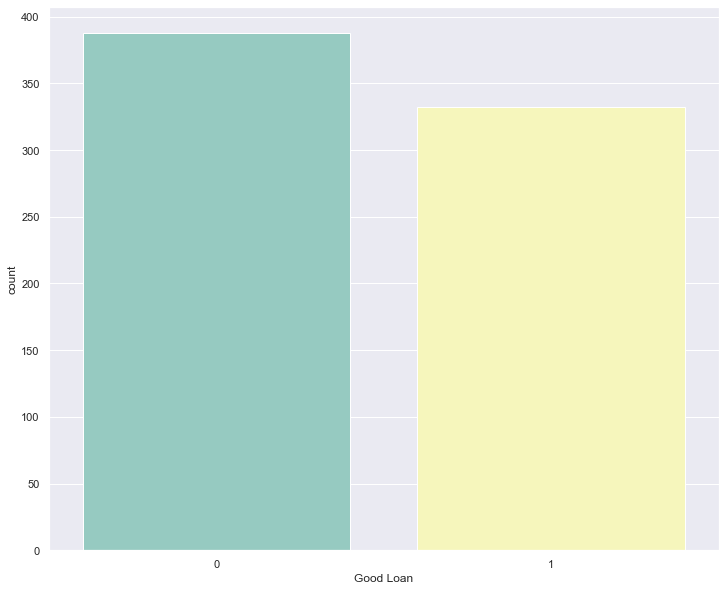

In [43]:
# Investigating the distribution of y_train

ax = sns.countplot(x = y_train, palette = "Set3")

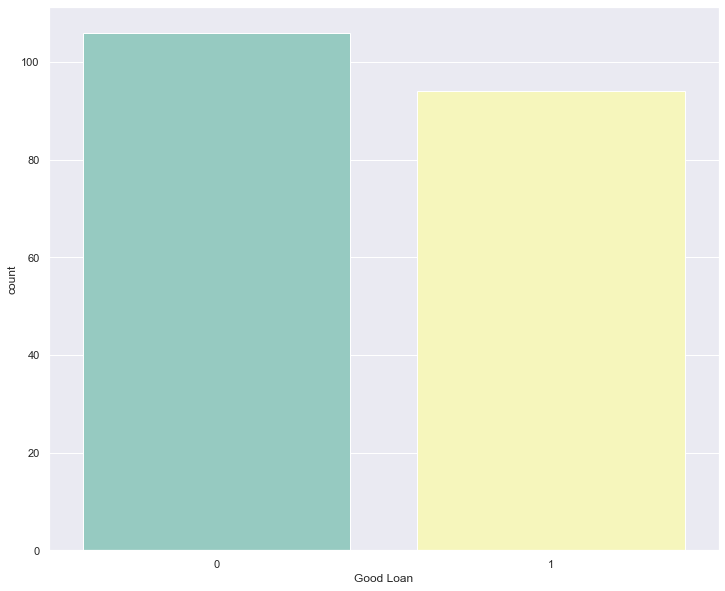

In [44]:
# Investigating the distribution of y_test

ax = sns.countplot(x = y_test, palette = "Set3")

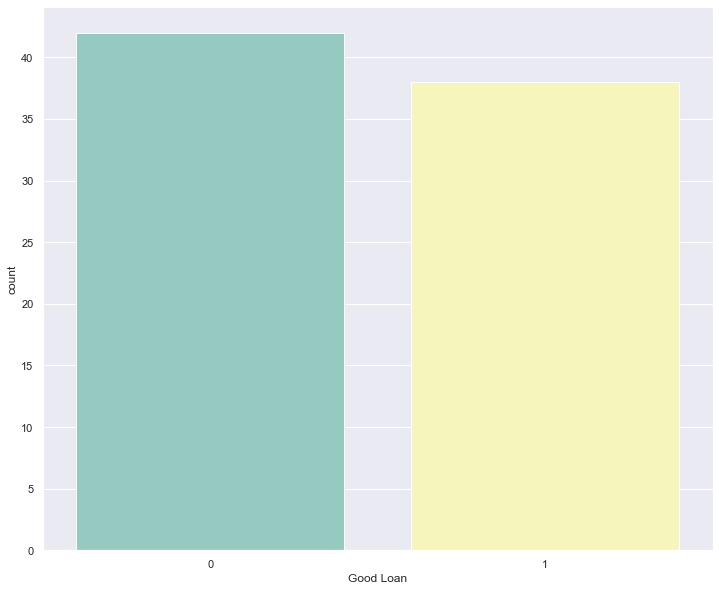

In [45]:
# Investigating the distr of y_valid

ax = sns.countplot(x = y_valid, palette = "Set3")

### 6. Modelling Data - Build Data Model

In [45]:
# Initialize an instance of Linear Determinant Analysis class.
lda = LDA()  

In [46]:
# Fit the linear discriminant model to the data. Use 'X' and then 'y'.
model = lda.fit(X_train, y_train)

In [47]:
# Ask the model to predict.
# Pass the testing data which has the input values.
y_predictions_test = model.predict(X_test)
y_predictions_train = model.predict(X_train)

In [48]:
# Show test predictions
y_predictions_test [0:10]

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [49]:
# Inspect shape
y_predictions_test.shape

(200,)

In [50]:
# Show train predictions
y_predictions_train [0:10]

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1])

In [51]:
# Inspect shape
y_predictions_train.shape

(720,)

In [52]:
# Show all test predictions
print(y_predictions_test)
type(y_predictions_test)

[1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1
 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1
 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1
 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0
 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0]


numpy.ndarray

In [53]:
# predict_probability - Probability estimates
# pred_probability_train for training dataset.
# It predits the probability of a class being '0' or class being '1'
pred_probability_train = model.predict_proba(X_train)
pred_probability_train
# First one shows [0.744743, 0.255257] 
# This means the probabilty of a class being '0' is 74%
# and the probabilty of a class being '1' is 25%

array([[0.744743, 0.255257],
       [0.180095, 0.819905],
       [0.803143, 0.196857],
       ...,
       [0.609024, 0.390976],
       [0.029297, 0.970703],
       [0.445091, 0.554909]])

In [54]:
# pred_probability_test for testing dataset.
pred_probability_test = model.predict_proba(X_test)
pred_probability_test

array([[0.404454, 0.595546],
       [0.303904, 0.696096],
       [0.533119, 0.466881],
       [0.410368, 0.589632],
       [0.381589, 0.618411],
       [0.540678, 0.459322],
       [0.158015, 0.841985],
       [0.720289, 0.279711],
       [0.256763, 0.743237],
       [0.757125, 0.242875],
       [0.963472, 0.036528],
       [0.941347, 0.058653],
       [0.906055, 0.093945],
       [0.841690, 0.158310],
       [0.401051, 0.598949],
       [0.184592, 0.815408],
       [0.065000, 0.935000],
       [0.992380, 0.007620],
       [0.658021, 0.341979],
       [0.085857, 0.914143],
       [0.661870, 0.338130],
       [0.257461, 0.742539],
       [0.971916, 0.028084],
       [0.362876, 0.637124],
       [0.713037, 0.286963],
       [0.186035, 0.813965],
       [0.986133, 0.013867],
       [0.583481, 0.416519],
       [0.688803, 0.311197],
       [0.967193, 0.032807],
       [0.036335, 0.963665],
       [0.965805, 0.034195],
       [0.742957, 0.257043],
       [0.224515, 0.775485],
       [0.6327

In [55]:
# coef_ - Coefficient of the features in the decision function
model.coef_ # weights for 42 features

array([[-0.000099, 0.004516, -1.062535, 1.193998, 0.107143, -0.309485,
        -0.485860, 1.319237, -1.152579, 0.915363, -0.447178, -0.528118,
        0.245196, -1.794568, 0.358556, -0.338786, 0.365802, 0.259603,
        0.094879, -1.351258, 0.958449, 0.298643, 1.148030, 1.082195,
        0.060109, -0.197673, 0.352774, -0.059003, -0.023235, -0.219086,
        -0.187793, 0.248302, -0.137999, -0.225479, 0.225479, -0.632705,
        0.671596, -0.190165, -0.064118, 0.275014, 0.053058, -0.263767]])

### 7. Model Evaluation

In [69]:
# Accuracy of model on Train data
print("The Training Accuracy is: ", lda.score(X_train, y_train))

# Accuracy of the model on Test data
print("The Testing Accuracy is: ", lda.score(X_test, y_test))


# Classification Report
print(classification_report(y_train, y_predictions_train))

The Training Accuracy is:  0.7777777777777778
The Testing Accuracy is:  0.8
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       388
           1       0.77      0.75      0.76       332

    accuracy                           0.78       720
   macro avg       0.78      0.78      0.78       720
weighted avg       0.78      0.78      0.78       720



In [58]:
# Quickly visualizing Confusion Matrix

cm = confusion_matrix(y_train, y_predictions_train)

In [59]:
# Inspect cm
cm
# Predicted 312 zeroes correct but predicted 84 zeroes incorrect

array([[312,  76],
       [ 84, 248]], dtype=int64)

In [60]:
# Inspect cm
np.diag(cm)

array([312, 248], dtype=int64)

In [61]:
# Inspect cm.sum(axis=0)
cm.sum(axis=0) # adds column elements: 312 + 84 = 396 and 76 + 248 = 324

array([396, 324], dtype=int64)

In [62]:
# Inspect cm.sum(axis=1)
cm.sum(axis=1) # adds row elements: 312 + 76 = 388 and 87 + 248 = 332
# So use this in the code below. But reshape it as shown below before using it.

array([388, 332], dtype=int64)

In [63]:
# Inspecting the reshape
cm.sum(axis=1).reshape(-1,1) # Reshape puts it in the right shape.

array([[388],
       [332]], dtype=int64)

In [64]:
# Eg: what %age is 309 zeroes out of 309 + 79 zeroes. So,
# Convert the confusion_matrix output into percentage. And reshape it because
# one is over the another.

cm_percentage = cm / cm.sum(axis=1).reshape(-1,1)
cm_percentage

array([[0.804124, 0.195876],
       [0.253012, 0.746988]])

In [65]:
# Define a function to plot Confusion matrix
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None: # classes are '0' and '1'
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [66]:
# Inspect lm.classes_
lda.classes_

array([0, 1])

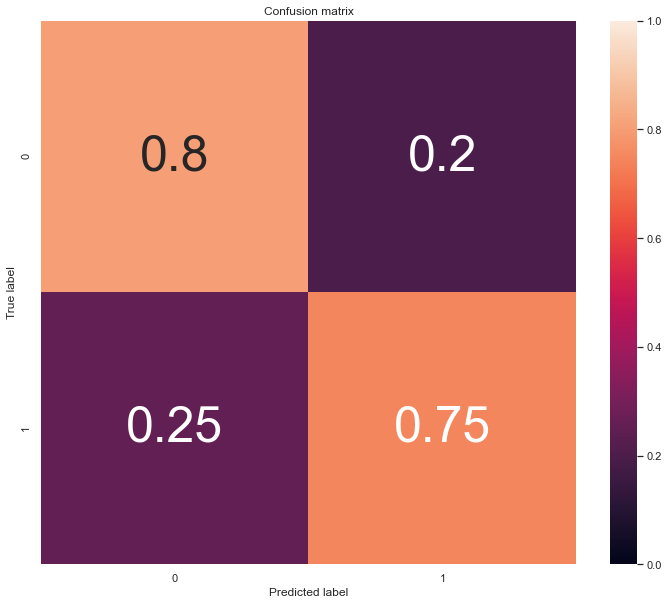

In [67]:
# Call the above function to plot Confusion Matrix
plot_confusion_matrix(cm_percentage, classes = lda.classes_, title='Confusion matrix')

# It shows how well the model predicts each class - 0 and 1.

# For Zeroes - 80% correct prediction and 20% incorrect prediction. Which means
# 80% was correctly predicted as bad loan while 20% was wrongly predicted as 
# good loan. 80% is high enough, so it's accurate.

# Fore Ones - 26% incorrect predictions and 74% correct predictions. Which means
# 26% was predicted as bad loans and 74% was predicted as good loans.

In [68]:
# Calculating Evaluation Metrics

# False Postives is 87 and 76 from cm and then deduct diagonal values 312 & 245.
FP = cm.sum(axis=0) - np.diag(cm) # False Positives (FP)
print("FP is:", FP)

# Same numbers in different order
FN = cm.sum(axis=1) - np.diag(cm) # False Negatives (FN) 
print("FN is:", FN)

# True Postivies are diagonal numbers: [312, 245]
TP = np.diag(cm) # True Positives (TP)
print("TP is:", TP)

# True Negatives are sum of all of our confusion matrix minus FP, FN & TP.
TN = cm.sum() - (FP + FN + TP) # True Negatives (TN)
print("TN is:", TN)

print("")

## Sensitivity, hit rate, recall, or true positive rate (Imp Metric)
TPR = TP / (TP + FN)
print("The TPR is:", TPR)
# It shows [0.804124 0.737952]. This means out of total bad loans (1) the model
# predicted 80% right and out of total good loans (0) the model predicted 73%
# right. Same values in the confusion matrix.

print("The average TPR is:", TPR.sum()/2)

print("")

## Precision or positive predictive value (Imp Metric)
PPV = TP / (TP + FP)
print("The PPV is:", PPV)

print("The average PPV is:", PPV.sum()/2)
# Shows [0.781955 0.763240]. Means 78% of bad loans (0s) were correct and 
# 76% of Good loans (1s) were correct.

print("")

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The FPR is:", FPR)
# Shows [0.262048 0.195876]. Means for bad loans (0s) the model classified 
# 26% as good loans (1s) and for good loans (1s) the model classified 19% as
# bad loans (1s). The model is accurate if the two numbers are as low as possible.

print("The average FPR is:", FPR.sum()/2)

print("")

# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The FNR is: ", FNR)
# Shows [0.195876 0.262048]. Same as the heat map.
print("The average FNR is:", FNR.sum()/2)

print("")

## Logarithmic loss - or Log Loss - or cross-entropy loss
# It's an error metric. If there's a probability or log likelihood  of an observation of being a bad loan (eg: 20%).
# Then 1 - 0.2 = 0.8. There is 80 % loss or 0.8 log loss of that bad loan being 
# a good loan.The attempt is to minimize logarithmic loss as much as possible.
# We can carry out HYPER PARAMETER TUNING to minimize this logarithmic loss.

# It shows which classifier is more accurate eventhough they
# both have similar predictions. Eg classifier with 90% predicted probability is
# more accurate than a classifier with 60% predicted probability even though both
# predit similar outcomes (Good loan). But the classifier with 90% predicted
# probability is a better classifier than the 60% one due to lower loss.

# Running Log loss on training
print("The Log Loss on Training Dataset is: ", log_loss(y_train, pred_probability_train))

# Running Log loss on testing
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_probability_test))


FP is: [84 76]
FN is: [76 84]
TP is: [312 248]
TN is: [248 312]

The TPR is: [0.804124 0.746988]
The average TPR is: 0.7755558315737175

The PPV is: [0.787879 0.765432]
The average PPV is: 0.77665544332211

The FPR is: [0.253012 0.195876]
The average FPR is: 0.22444416842628245

The FNR is:  [0.195876 0.253012]
The average FNR is: 0.22444416842628245

The Log Loss on Training Dataset is:  0.44685363873511647
The Log Loss on Testing Dataset is:  0.4638609910797144


### 8. Deploy Model

In [ ]:
# Deploy the final model in the cloud or a CRM system or visualization tools to
# aid the Bank in all future loan approval decisions. Saves time and money
# Deploy it on the the Bank website for customers to quicly check their laon approval
# eligibilty. Saves time and money for the customers.
# Reduces time for loan approval process which in turn improves customer service.
# Helps Bank to educate customers on factors that will improve chances of future 
# loan being approved. Improves customer engagement, service and retention.